# Exercise 3.4 – Pathwise Properties of Brownian Motion

In this exercise, we study the **quadratic variation** and **total variation** of a Brownian motion numerically using Python. We will verify **Lévy’s Theorem** and illustrate that the total variation diverges.

---

## a) Define a Function to Compute the Quadratic Variation

We define a Python function `Variation(t, n)` that computes the quadratic variation of Brownian motion over the interval \([0, t]\) using an equidistant partition of size $ n $:

$$
\sum_{i=1}^{n} (W_{t_i} - W_{t_{i-1}})^2,
\quad \text{where} \quad t_i = \frac{i}{n}t.
$$

Recall that Brownian increments are normally distributed with:

$$
W_{t_i} - W_{t_{i-1}} \sim \sqrt{t_i - t_{i-1}} \cdot \mathcal{N}(0, 1).
$$

---

## b) Estimate Quadratic Variation for Different $n$

Set $t = 1$ and compute:

$$
\sum_{i=1}^{n} (W_{t_i} - W_{t_{i-1}})^2
$$

for $ n = 10, 100, 10000 $, repeating the simulation multiple times to obtain a distribution of estimates. Then, compare these to the theoretical value:

$$
\langle W \rangle_t = t = 1.
$$

This will numerically confirm **Lévy's Theorem**, which states that the quadratic variation of Brownian motion over $[0, t]$ is exactly $ t $, almost surely.

---

## c) Show that Total Variation Diverges

We now compute the **total variation** over the same partition:

$$
\sum_{i=1}^{n} |W_{t_i} - W_{t_{i-1}}|.
$$

As $ n \to \infty $, this sum diverges almost surely. This illustrates that while Brownian motion has finite quadratic variation, its **total variation is infinite**, highlighting the pathwise irregularity of Brownian trajectories.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(40)

In [2]:
def Qvariation(t,n): #quadratic variation
    QuadraticVariation = 0
    partition = np.linspace(0,t,n+1)
    for i in range(n):
        variation = np.sqrt(partition[i+1]-partition[i]) * np.random.standard_normal()
        QuadraticVariation += variation*variation
    return QuadraticVariation


In [3]:
Qvariation(1,100000)

1.0056185428048392

In [4]:
def Svariation(t,n): #simple variation
    SimpleVariation = 0
    partition = np.linspace(0,t,n+1)
    for i in range(n):
        variation = np.sqrt(partition[i+1]-partition[i]) * np.random.standard_normal()
        SimpleVariation += abs(variation)
    return SimpleVariation


In [5]:
Svariation(1,1000000)

797.8105953953481

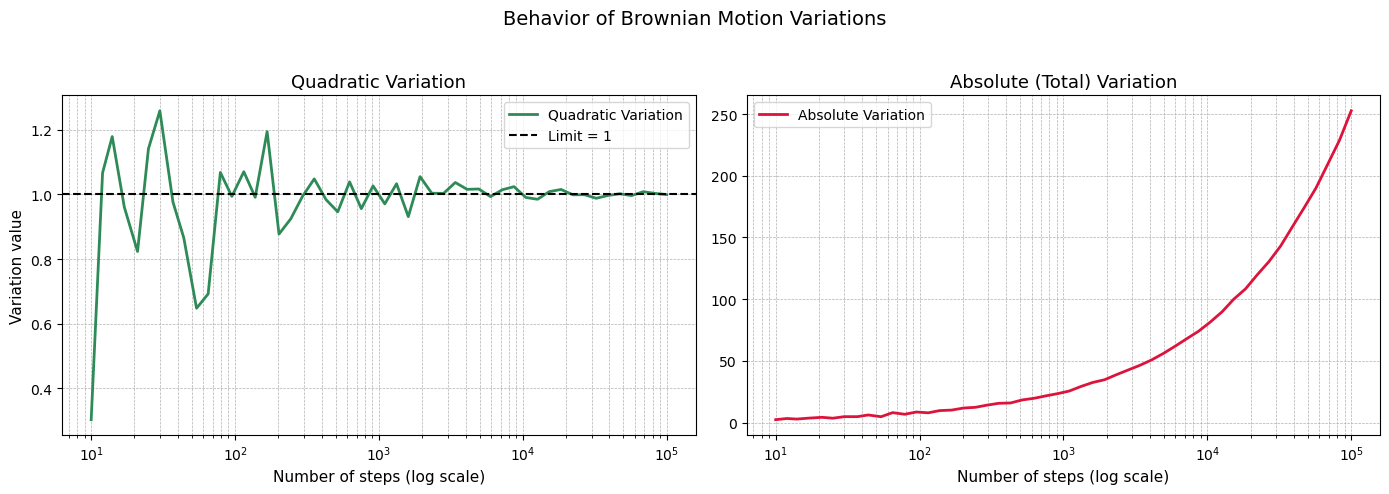

In [6]:
# Simulation parameters
time_horizon = 1
step_counts = np.logspace(1, 5, 50, dtype=int)  # From 10 to 100000 steps
quadratic_values = []
absolute_values = []

# Run simulations
for steps in step_counts:
    qv = Qvariation(time_horizon, steps)
    av = Svariation(time_horizon, steps)
    quadratic_values.append(qv)
    absolute_values.append(av)

# Plotting as subplots in one figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

# Quadratic variation plot
ax1.plot(step_counts, quadratic_values, label='Quadratic Variation', color='seagreen', linewidth=2)
ax1.axhline(y=time_horizon, color='black', linestyle='--', label='Limit = 1')
ax1.set_title('Quadratic Variation', fontsize=13)
ax1.set_xlabel('Number of steps (log scale)', fontsize=11)
ax1.set_ylabel('Variation value', fontsize=11)
ax1.set_xscale('log')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.legend()

# Absolute variation plot
ax2.plot(step_counts, absolute_values, label='Absolute Variation', color='crimson', linewidth=2)
ax2.set_title('Absolute (Total) Variation', fontsize=13)
ax2.set_xlabel('Number of steps (log scale)', fontsize=11)
ax2.set_xscale('log')
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.legend()

# Overall title and layout
fig.suptitle('Behavior of Brownian Motion Variations', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
